# Scripting the new translation and rotation

We have finished working through the math of the temporal instanton problem. Here we develop a script to perform the various solution steps.

## Data import

First thing's first. Load the data:

In [1]:
####### IMPORTS: DATA ACQUISITION ########
include("../src/tmp_inst_rts96.jl")

psData = psDataLoad()

# unpack psDL (boilerplate):
(Sb,f,t,r,x,b,Y,bustype,
Gp,Gq,Dp,Dq,Rp,Rq,
Pmax,Pmin,Qmax,Qmin,Plim,
Vg,Vceiling,Vfloor,
busIdx,N,Nr,Ng,k) = unpack_psDL(psData)

####### IMPORTS: INSTANTON CODE ########
# Get instanton code into workspace:
include("../src/TemporalInstanton.jl")
include("../src/TrustRegionSubproblem.jl")

using TemporalInstanton

####### DATA LINKING ########
# Static
Ridx = find(Rp) # Vector of renewable nodes
Y = full(Y) # Full admittance matrix (ref not removed)
ref = 1 # Index of ref node
k = k # Conventional generator participation factors
tau = 1. # Heating constant
G0 = [Gp,Gp.*0.95,Gp.*0.9]
D0 = [Dp,Dp.*0.95,Dp.*0.9]
P0 = [Rp,Rp,Rp]
kQobj = 0 # Should always be zero; objective has no constant term
c = 1. # RHS of line temperature constraint
kQtheta = -c # Move to LHS so we have Q(z) = 0

T = int(length(G0)/size(Y,1))

# Changing:
lines = [(f[i],t[i]) for i in 1:length(f)];

# For a single line:
line = lines[48]

# Create instance of instanton problem
Qobj,A,b,Qtheta = temporalInstanton(Ridx,Y,ref,k,tau,line,G0,P0,D0)

(
279x279 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [2]:
# Build obj and constraint quadratics:
G_of_x = (Qobj,0,kQobj)
Q_of_x = (Qtheta,0,kQtheta)

(
279x279 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

## Translation

The following two methods partition the $A$ matrix, find the appropriate translation point $x^*$, and translate a general quadratic:

In [5]:
function partition_A(A,Qobj,T)
    """ Return A1, A2, A3 where
    A1 corresponds to wind
    A2 corresponds to angles + mismatch
    A3 corresponds to angle difference vars
    """
    m,n = size(A)
    idx1 = find(diag(Qobj))
    idx2 = setdiff(1:n-T,idx1)
    idx3 = n-T+1:n
    idx = [idx1,idx2,idx3]
    
    A1 = A[:,idx1]
    A2 = A[:,idx2]
    A3 = A[:,idx3]
    return A1,A2,A3,idx1,idx2,idx3
end

function find_x_star(Qobj,A,b,T)
    A1,A2,A3,idx1,idx2,idx3 = partition_A(A,Qobj,T)
    x_star = zeros(size(A,2))
    x_star[[idx1,idx2]] = [A1 A2]\b
    return x_star
end

function translate_quadratic(G_of_x,x_star)
    """ This function performs the change of variables from x to z,
    where z = x - x_star. (For translating a quadratic problem.)
    Returns triple H_of_x consisting of matrix H, vector h, constant kh.

    Arguments
    G_of_x consists of matrix G, vector g, constant kg.
    x_star is translation.

    Assume x_star is min-norm solution of Ax=b.
    """
    G,g,kg = G_of_x
    if g == 0
        g = zeros(size(G,1),1)
    end
    H = G
    h = g + 2*G*x_star
    kh = kg + x_star'*G*x_star + g'*x_star
    return (H,h,kh[1])
end

translate_quadratic (generic function with 1 method)

Use the above methods to translate the problem:

In [6]:
# Partition A:
A1,A2,A3,idx1,idx2,idx3 = partition_A(A,Qobj,T)

# Find translation point:
x_star = find_x_star(Qobj,A,b,T)

# Translate quadratics:
G_of_y = translate_quadratic(G_of_x,x_star)
Q_of_y = translate_quadratic(Q_of_x,x_star)

(
279x279 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

Quick inspection shows that $G(y)$ has a linear term, but $Q(y)$ does not, as expected.

## Kernel mapping

Here we "rotate" by $N^\top$, where $N$ consists of $k$ columns spanning $\mathcal{N}(A)$.

The following method rotates a quadratic:

In [7]:
function rotate_quadratic(G_of_x,R)
    """ Rotate quadratic G_of_x by
    rotation matrix R.
    """
    G,g,kg = G_of_x
    return (R*G*R',R*g,kg)
end

rotate_quadratic (generic function with 1 method)

This method finds $N$:

In [8]:
function kernel_rotation(A)
    """ Find an orthonormal basis for the 
    nullspace of A. This matrix may be used
    to rotate a temporal instanton problem
    instance.
    """
    m,n = size(A)
    dim_N = n - rank(A)
    # if A has full row rank:
    # dim_N = n - m
    q = qr(A'; thin=false)[1]
    R = circshift(q,(0,dim_N))
    return R
end

kernel_rotation (generic function with 1 method)

Here we find and partition $N$, then rotate our objective and constraint quadratics by it:

In [9]:
N = kernel_rotation(A)[:,1:size(A,2) - rank(A)] # take only first k cols

N1,N2,N3 = N[idx1,:],N[idx2,:],N[idx3,:] # partition N

G_of_z = rotate_quadratic(G_of_y,N')
Q_of_z = rotate_quadratic(Q_of_y,N')

(
54x54 Array{Float64,2}:
  8.57715e-6  -7.83568e-6   8.32729e-6  …  -4.07499e-6  -9.85393e-6
 -7.83568e-6   1.91934e-5   5.16678e-6      3.09765e-6   1.42626e-5
  8.32729e-6   5.16678e-6   3.24455e-5     -2.57993e-6  -2.01826e-6
 -1.53017e-6   1.33535e-5   8.37457e-6     -4.28291e-7   6.46892e-6
  3.71994e-7   1.28016e-5   2.91055e-7     -3.50642e-6   2.76647e-6
 -2.11083e-7   1.47391e-5  -1.14544e-5  …  -5.69497e-6   1.74543e-6
 -2.1289e-6    1.01688e-5   2.87208e-5      4.74971e-6   1.00533e-5
  3.44011e-6   8.8652e-6    3.51056e-6     -4.63256e-6  -9.91135e-7
 -3.34661e-6   1.28924e-5   7.6256e-6       1.16143e-6   8.22289e-6
 -4.765e-6     1.32255e-5   1.22824e-5      3.21765e-6   1.07152e-5
 -1.75752e-6   9.48476e-6   2.5917e-5   …   4.06274e-6   8.96682e-6
 -2.55424e-6   1.02789e-5   1.16742e-5      1.88109e-6   7.44803e-6
 -7.16027e-6   1.42599e-5   9.35653e-6      4.53344e-6   1.30762e-5
  ⋮                                     ⋱                          
 -1.52987e-6  -1.7632e

Now things are a bit messy. Neither the objective nor the constraint quadratics are diagonal.

## Constraint Eigendecomposition and rotation

Here we change variables from $z$ to $w$ to render the constraint a norm constraint. This is done by letting $w=KU^\top z$ where `D,U = eig(Q_of_z[1])`. Thus, we can use the previously defined rotation method with $R=(UK^{-1})^\top$.

The following method computes $K$:

In [10]:
function return_K(D)
    K = ones(length(D))
    K[find(D)] = sqrt(D[find(D)])
    K = diagm(K)
    return K
end

return_K (generic function with 1 method)

This script finds $U$, stores $K$, and uses them rotate the problem:

In [11]:
D,U = eig(Q_of_z[1])
D = round(D,10)

K = return_K(D)

G_of_w = rotate_quadratic(G_of_z,(U/K)')
Q_of_w = rotate_quadratic(Q_of_z,(U/K)')

(
54x54 Array{Float64,2}:
 -3.1655e-22    6.42902e-22  -2.95008e-22  …   3.08591e-18   3.51695e-19
 -6.32953e-22  -1.18732e-21  -9.85102e-22      1.96146e-18   1.27949e-19
  8.97254e-23   4.61686e-21  -1.9837e-21       1.92169e-19  -3.06666e-19
 -1.46922e-21  -1.16393e-21   1.34214e-21     -9.44767e-19  -5.31573e-19
  2.81569e-21   1.09645e-21   1.3895e-22       1.90773e-18   1.08272e-18
  9.03974e-22  -1.98887e-21   1.61209e-21  …  -1.12167e-18   1.14232e-18
 -4.93817e-22   2.01697e-21  -4.6876e-22       1.65762e-18  -3.13352e-19
  5.6677e-22    1.52363e-21   2.13615e-21      4.23676e-19   1.25812e-18
  2.25058e-21   4.45724e-22  -1.21819e-21      1.97259e-18  -1.4752e-18 
 -8.67591e-22  -9.32033e-22  -2.60927e-21     -6.91245e-19  -3.91314e-19
 -2.2538e-22   -4.77284e-22  -2.554e-21    …   7.75556e-19  -2.19673e-19
  8.48507e-22   3.28066e-22  -3.42608e-24     -7.2416e-20    2.34875e-19
  4.5347e-22    1.17648e-21   6.82619e-22     -6.39781e-19  -3.71642e-19
  ⋮                      

The objective is still a mess, but now `Q_of_w[1]` is all zeros with $T$ ones at the end of its diagonal, as desired.

## Eliminating $w_1$

We are only interested in $w_2$ -- $w_1$ doesn't enter into the constraint, so we will eliminate it using the KKT conditions.

This means we want to 

* partition $B=$ `G_of_w[1]` into $B_{11}$, $B_{12}$, and $B_{22}$

* partition $b$ into $b_1$ and $b_2$

* solve for $\hat{B}$ and $\hat{b}$.

The following methods find and partition $B$ and $b$, and solve for $\hat{B}$ and $\hat{b}$:

In [12]:
function partition_B(G_of_w,Q_of_w)
    B,b = G_of_w[1],G_of_w[2]
    Q = round(Q_of_w[1])
    i2 = find(diag(Q))
    i1 = setdiff(1:size(Q,1),i2)
    B11,B12,B21,B22 = B[i1,i1],B[i1,i2],B[i2,i1],B[i2,i2]
    b1 = b[i1]
    b2 = b[i2]
    return B11,B12,B21,B22,b1,b2
end

function return_Bhat(B11,B12,B22,b2)
    Bhat = B22 - (B12'/B11)*B12
    bhat = b2 - (B12'/B11)*b1
    return round(Bhat,10),bhat
end

return_Bhat (generic function with 1 method)

This script uses the above methods to return $\hat{B}$ and $\hat{b}$ for the RTS-96:

In [13]:
B11,B12,B21,B22,b1,b2 = partition_B(G_of_w,Q_of_w)

Bhat,bhat = return_Bhat(B11,B12,B22,b2)

(
3x3 Array{Float64,2}:
 2796.47     0.0     -0.0 
    0.0   2796.47    -0.0 
   -0.0     -0.0   2796.47,

[-667.413,-1184.36,-661.118])

Note that $\hat{B}$ is diagonal.

___
Skipping objective diagonalization because $\hat{B}$ is already diagonal...
___

## Solution via first-order optimality conditions

We now have

\begin{align*}
&& \min~ w_2^\top \hat{B}w_2 + w_2^\top \hat{b} \\
s.t. && w_2^\top w_2 &= c
\end{align*}

Where $\hat{B}$ is diagonal. When we write the first-order optimality conditions, we obtain a relationship for $\hat{w}_2$ in terms of $v$:

\begin{align}
\hat{w}_{2,i} &= \frac{1}{2}\left(\frac{\hat{b}_i}{v - \hat{B}_{i,i}}\right)
\end{align}

This method takes $v$ as an argument and returns $\hat{w}_2$ according to the relationship above:

In [14]:
function find_w(v,D,d)
    if v == 0
        w = float([-d[i]/(D[i,i]) for i in 1:length(d)])
    else
        w = float([d[i]/(v - D[i,i]) for i in 1:length(d)])
    end
    return w
end

find_w (generic function with 1 method)

Note that `D` should be $\hat{B}$ and `d` should be $\hat{b}/2$.

Before we can solve the secular equation, we need to rule out the case $v=0$. The following script does this:

In [15]:
eps = 1e-8
w0 = find_w(0,Bhat,bhat/2)

c = - Q_of_w[3]

if abs((w0'*w0) - c)[1] < eps
    println("v=0 works!")
end

Now we can formulate and solve the secular equation. The general form is:

\begin{align}
s(v) &= \sum_i \left(\frac{d_i}{v - D_{i,i}}\right)^2 = c
\end{align}

The following method solves this equation using binary search:

In [16]:
function solve_secular(D,d,c)
    """ Solve the secular equation via binary search.
    """
    eps = 1e-8
    solutions = Float64[]
    vectors = Array(Vector{Float64},0)
    poles = sort(unique(round(diag(D),10)))
    
    # Each diagonal element is a pole.
    for i in 1:length(poles)
        
        # Head left first:
        high = poles[i]
        if length(poles) == 1
            low = high - high
        elseif i == 1
            low = high - abs(poles[i] - poles[i+1])
        else
            low = high - abs(poles[i] - poles[i-1])/2
        end
        
        # Initialize v:
        v = (high + low)/2
        w = find_w(v,D,d)
        diff = (w'*w)[1] - c
        diff_old = 0
        stall = false
        while abs(diff) > eps
            if diff == diff_old
                stall = true
                break
            end
            if diff > 0
                high = v
            else
                low = v
            end
            v = (high + low)/2
            w = find_w(v,D,d)
            diff_old = diff
            diff = (w'*w)[1] - c
        end
        if !stall
            push!(solutions,v)
            push!(vectors,w)
        end
        
        # Now head right:
        high = poles[i]
        if length(poles) == 1
            low = high + high
        elseif i == length(poles)
            low = high + abs(poles[i] - poles[i-1])
        else
            low = high + abs(poles[i] - poles[i+1])/2
        end
        
        v = (high + low)/2
        w = find_w(v,D,d)
        diff = (w'*w)[1] - c
        diff_old = 0
        stall = false
        while abs(diff) > eps
            if diff == diff_old
                stall = true
                break
            end
            if diff > 0
                high = v
            else
                low = v
            end
            v = (high + low)/2
            w = find_w(v,D,d)
            diff_old = diff
            diff = (w'*w)[1] - c
        end
        if !stall
            push!(solutions,v)
            push!(vectors,w)
        end
    end
    return solutions,vectors
end

solve_secular (generic function with 1 method)

This line solves the secular equation for our particular problem:

In [17]:
solutions, vectors = solve_secular(Bhat,bhat/2,-Q_of_w[3])

([2040.62,3552.32],[[0.441499,0.783465,0.437335],[-0.441499,-0.783465,-0.437335]])

Let's visualize the secular equation:

In [104]:
using Interact
using PyPlot

INFO: Loading help data...


Slider{Float64}([Input{Float64}] 1.25,"c",1.25,0.5:0.05:2.0)

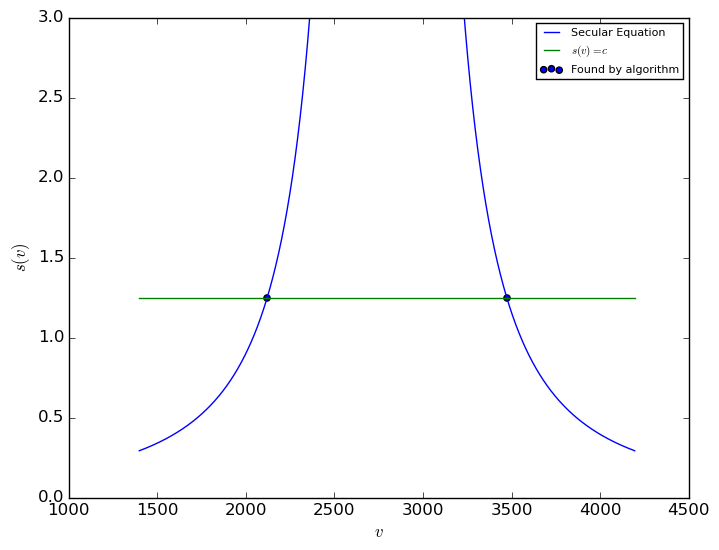

In [119]:
f = figure()
poles = sort(unique(round(diag(Bhat),10)))

@manipulate for c = 0.5:0.05:2; withfig(f) do
        solutions,vectors = solve_secular(Bhat,bhat/2,c)

        v_vals = linspace(0.5*minimum(poles),1.5*maximum(poles),10000)
        s_vals = [(find_w(i,Bhat,bhat/2)'*find_w(i,Bhat,bhat/2))[1] for i in v_vals]
        plot(v_vals,s_vals)
        hold = true
        plot([v_vals[1],v_vals[end]],[c,c])
        ylim([0,3])
        scatter(solutions,c*ones(length(solutions)))
        legend(["Secular Equation",L"s(v) = c","Found by algorithm"],fontsize=8)
        xlabel(L"v")
        ylabel(L"s(v)")        
    end
end

## Mapping back

Having found solutions $\hat{w}_2^*$, we need to map back to the original problem space.

In [18]:
function return_xopt(w2opt,B11,B12,b1,N,U,K,x_star)
    w1opt = -B11\(B12*w2opt + b1/2)
    wopt = [w1opt,w2opt]
    xopt = (N*U/K)*wopt + x_star
    return xopt
end

return_xopt (generic function with 1 method)

In [19]:
xopt = return_xopt(vectors[1],B11,B12,b1,N,U,K,x_star)

279-element Array{Float64,1}:
   0.763317  
   3.03236   
   3.39841   
   3.22306   
   3.14139   
   4.038     
   4.59416   
   3.06555   
   4.90005   
 -17.9025    
  -7.37709   
  -5.21467   
   4.49813   
   ⋮         
  -0.0990153 
   0.0721015 
   0.176531  
  -0.0575429 
  -0.00701291
   0.242252  
  -0.0594341 
   0.288992  
 -45.6281    
  -0.606609  
  -0.576838  
  -0.547068  

Sanity checks:

In [20]:
maximum(abs(A*xopt - b))

2.6403323971635473e-12

In [21]:
xopt'*Qtheta*xopt

1-element Array{Float64,1}:
 1.0

Everything looks good. Time to write a module and condense.